# Project - (Prosper Loan Data  Exploration)
## by (Ndifreke Charles)

## Introduction
> Prosper Loan Data (prosperloanData.csv) represents personal loans requested through Prosper's peer to peer loan servicing network. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.



## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Load the Dataset


In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# The dimension of the dataset.
df.shape

(113937, 81)

In [4]:
# Overview ofthe data composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


There are too many columns, I'll be creating a subset with all the columns needed for this project.

In [7]:
#creating a subset 

cols = ['LoanStatus', 'BorrowerAPR', 'BorrowerRate','EmploymentStatus','EstimatedReturn','ListingCategory (numeric)','LoanOriginationDate', 'Occupation','StatedMonthlyIncome',
        'IncomeVerifiable','IncomeRange','MonthlyLoanPayment', 'IsBorrowerHomeowner','DebtToIncomeRatio', 'LoanOriginalAmount', 'Term', 'ProsperRating (Alpha)']
loans = df[cols]

In [8]:
loans.head(10)

,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,EstimatedReturn,ListingCategory (numeric),LoanOriginationDate,Occupation,StatedMonthlyIncome,IncomeVerifiable,IncomeRange,MonthlyLoanPayment,IsBorrowerHomeowner,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperRating (Alpha)
0,Completed,0.16516,0.1580,Self-employed,NaN,0,2007-09-12 00:00:00,Other,3083.333333,True,"$25,000-49,999",330.43,True,0.17,9425,36,NaN
1,Current,0.12016,0.0920,Employed,0.05470,2,2014-03-03 00:00:00,Professional,6125.000000,True,"$50,000-74,999",318.93,False,0.18,10000,36,A
2,Completed,0.28269,0.2750,Not available,NaN,0,2007-01-17 00:00:00,Other,2083.333333,True,Not displayed,123.32,False,0.06,3001,36,NaN
3,Current,0.12528,0.0974,Employed,0.06000,16,2012-11-01 00:00:00,Skilled Labor,2875.000000,True,"$25,000-49,999",321.45,True,0.15,10000,36,A
4,Current,0.24614,0.2085,Employed,0.09066,2,2013-09-20 00:00:00,Executive,9583.333333,True,"$100,000+",563.97,True,0.26,15000,36,D
5,Current,0.15425,0.1314,Employed,0.07077,1,2013-12-24 00:00:00,Professional,8333.333333,True,"$100,000+",342.37,True,0.36,15000,60,B
6,Current,0.31032,0.2712,Employed,0.11070,1,2013-04-18 00:00:00,Sales - Retail,2083.333333,True,"$25,000-49,999",122.67,False,0.27,3000,36,E
7,Current,0.23939,0.2019,Employed,0.09840,2,2013-05-13 00:00:00,Laborer,3355.750000,True,"$25,000-49,999",372.60,False,0.24,10000,36,C
8,Current,0.07620,0.0629,Employed,0.04231,7,2013-12-12 00:00:00,Food Service,3333.333333,True,"$25,000-49,999",305.54,True,0.25,10000,36,AA
9,Current,0.07620,0.0629,Employed,0.04231,7,2013-12-12 00:00:00,Food Service,3333.333333,True,"$25,000-49,999",305.54,True,0.25,10000,36,AA


In [9]:
loans.shape

(113937, 17)

In [10]:
loans.describe()

,BorrowerAPR,BorrowerRate,EstimatedReturn,ListingCategory (numeric),StatedMonthlyIncome,MonthlyLoanPayment,DebtToIncomeRatio,LoanOriginalAmount,Term
count,113912.000000,113937.000000,84853.000000,113937.000000,1.139370e+05,113937.000000,105383.000000,113937.00000,113937.000000
mean,0.218828,0.192764,0.096068,2.774209,5.608026e+03,272.475783,0.275947,8337.01385,40.830248
std,0.080364,0.074818,0.030403,3.996797,7.478497e+03,192.697812,0.551759,6245.80058,10.436212
min,0.006530,0.000000,-0.182700,0.000000,0.000000e+00,0.000000,0.000000,1000.00000,12.000000
25%,0.156290,0.134000,0.074080,1.000000,3.200333e+03,131.620000,0.140000,4000.00000,36.000000
50%,0.209760,0.184000,0.091700,1.000000,4.666667e+03,217.740000,0.220000,6500.00000,36.000000
75%,0.283810,0.250000,0.116600,3.000000,6.825000e+03,371.580000,0.320000,12000.00000,36.000000
max,0.512290,0.497500,0.283700,20.000000,1.750003e+06,2251.510000,10.010000,35000.00000,60.000000


In [11]:
loans['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [12]:
#Check sum of null rows for each variable
loans.isnull().sum()

LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
EmploymentStatus              2255
EstimatedReturn              29084
ListingCategory (numeric)        0
LoanOriginationDate              0
Occupation                    3588
StatedMonthlyIncome              0
IncomeVerifiable                 0
IncomeRange                      0
MonthlyLoanPayment               0
IsBorrowerHomeowner              0
DebtToIncomeRatio             8554
LoanOriginalAmount               0
Term                             0
ProsperRating (Alpha)        29084
dtype: int64

In [13]:
# Drop all rows with null values
loans.dropna(inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
# Checking if there are still any rows with null values in the dataframe
loans.isnull().sum().sum()

0

In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76224 entries, 1 to 113936
Data columns (total 17 columns):
LoanStatus                   76224 non-null object
BorrowerAPR                  76224 non-null float64
BorrowerRate                 76224 non-null float64
EmploymentStatus             76224 non-null object
EstimatedReturn              76224 non-null float64
ListingCategory (numeric)    76224 non-null int64
LoanOriginationDate          76224 non-null object
Occupation                   76224 non-null object
StatedMonthlyIncome          76224 non-null float64
IncomeVerifiable             76224 non-null bool
IncomeRange                  76224 non-null object
MonthlyLoanPayment           76224 non-null float64
IsBorrowerHomeowner          76224 non-null bool
DebtToIncomeRatio            76224 non-null float64
LoanOriginalAmount           76224 non-null int64
Term                         76224 non-null int64
ProsperRating (Alpha)        76224 non-null object
dtypes: bool(2), float64

In [16]:
# Convert LoanOriginationDate from object to datetime datatypes
loans['LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
# Convert Stated Monthly Income from float to int datatypes

loans['StatedMonthlyIncome'] = loans['StatedMonthlyIncome'].astype(int)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76224 entries, 1 to 113936
Data columns (total 17 columns):
LoanStatus                   76224 non-null object
BorrowerAPR                  76224 non-null float64
BorrowerRate                 76224 non-null float64
EmploymentStatus             76224 non-null object
EstimatedReturn              76224 non-null float64
ListingCategory (numeric)    76224 non-null int64
LoanOriginationDate          76224 non-null datetime64[ns]
Occupation                   76224 non-null object
StatedMonthlyIncome          76224 non-null int64
IncomeVerifiable             76224 non-null bool
IncomeRange                  76224 non-null object
MonthlyLoanPayment           76224 non-null float64
IsBorrowerHomeowner          76224 non-null bool
DebtToIncomeRatio            76224 non-null float64
LoanOriginalAmount           76224 non-null int64
Term                         76224 non-null int64
ProsperRating (Alpha)        76224 non-null object
dtypes: bool(2), d

In [19]:
loans.head()

,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,EstimatedReturn,ListingCategory (numeric),LoanOriginationDate,Occupation,StatedMonthlyIncome,IncomeVerifiable,IncomeRange,MonthlyLoanPayment,IsBorrowerHomeowner,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperRating (Alpha)
1,Current,0.12016,0.0920,Employed,0.05470,2,2014-03-03,Professional,6125,True,"$50,000-74,999",318.93,False,0.18,10000,36,A
3,Current,0.12528,0.0974,Employed,0.06000,16,2012-11-01,Skilled Labor,2875,True,"$25,000-49,999",321.45,True,0.15,10000,36,A
4,Current,0.24614,0.2085,Employed,0.09066,2,2013-09-20,Executive,9583,True,"$100,000+",563.97,True,0.26,15000,36,D
5,Current,0.15425,0.1314,Employed,0.07077,1,2013-12-24,Professional,8333,True,"$100,000+",342.37,True,0.36,15000,60,B
6,Current,0.31032,0.2712,Employed,0.11070,1,2013-04-18,Sales - Retail,2083,True,"$25,000-49,999",122.67,False,0.27,3000,36,E


I did a little data wrangling to ensure my data is ready for visualization.

### What is the structure of your dataset?

> There are 113,937 rows with 81 variables on each loan, including loan amount, borrower rate, StatedMonthlyIncome, current loan status, occupation, and many others. Most of the variables are numeric in nature.


### What is/are the main feature(s) of interest in your dataset?

> The dataset has plenty of features to explore. For the purpose of this analysis, I'll be exploring BorrowerAPR, LoanOriginalAmount, StatedMonthlyIncome and also the  numerical and categorical features in this dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will explore the relationships between LoanStatus and BorrowerAPR, Borrower APR against Stated Monthly Income, Effect of ProsperRating (Alpha) on APR and LoanOriginalAmount, Estimated Returns by IncomeRange vs EmploymentStatus. I will also dig into some of the relationships between some independent variables and many more.

## Univariate Exploration



### Question 1: What are the Top Occupations that Requests for Loans?

### Visualization

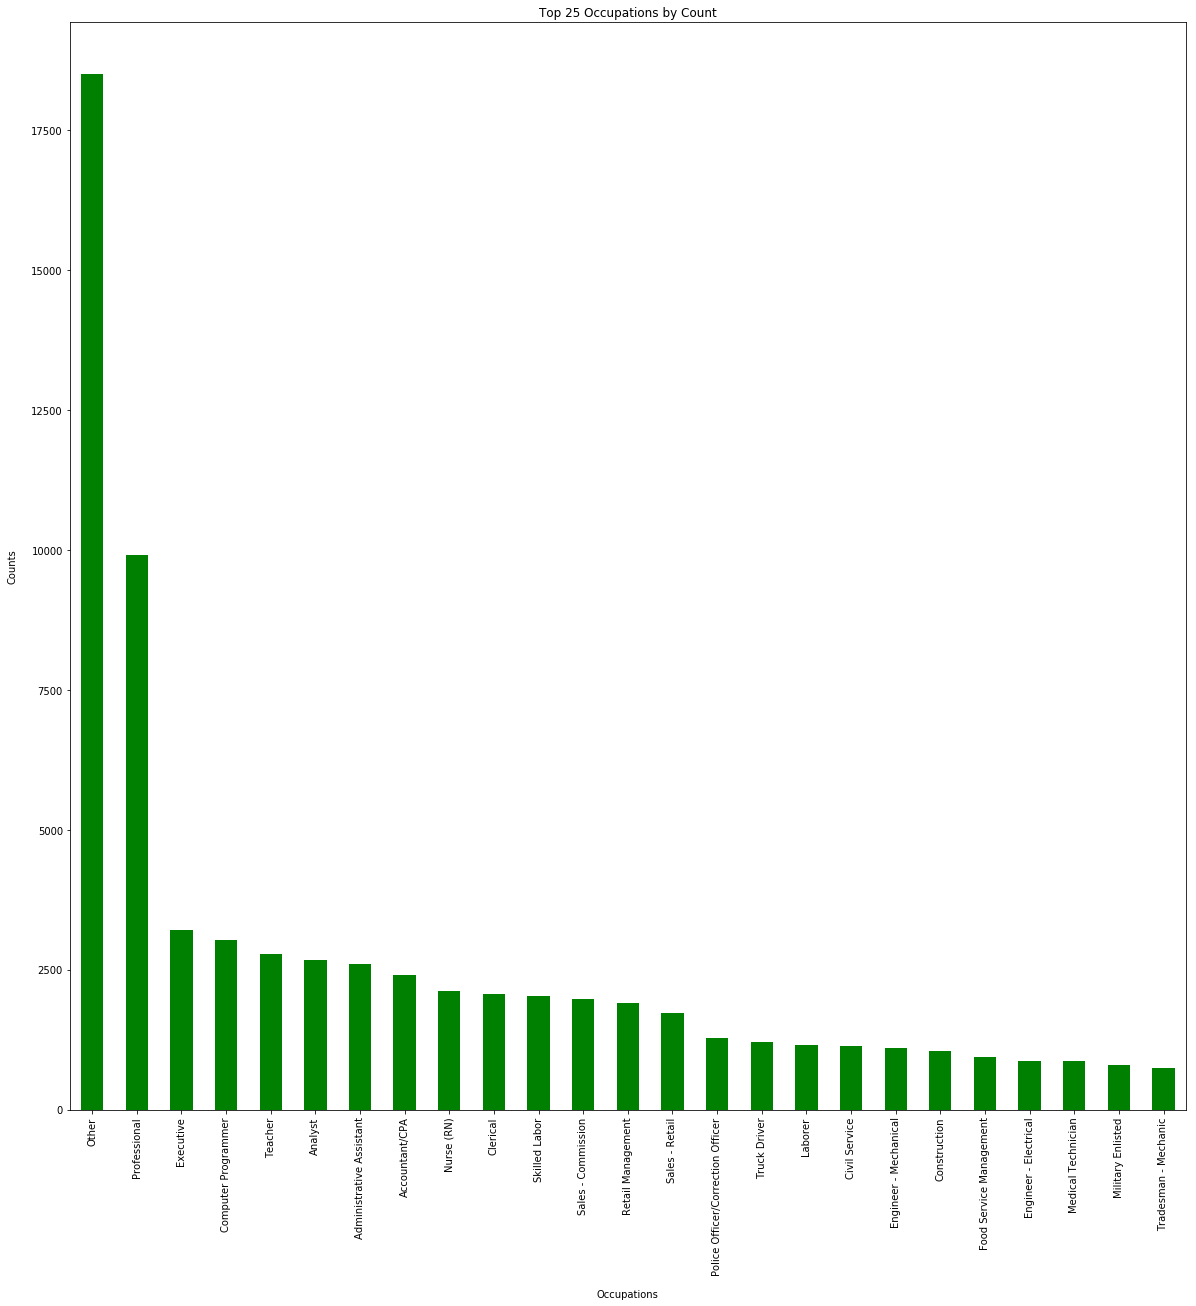

In [20]:
#plotting a bar plot showing the Top 25 Occupations By Count


def plot_top_categories_by_count(dataframe, category_column, n=25, title= '', xlabel ='', ylabel ='',figsize= [20,20], color = 'green'):
    """                       
    plot a bar chart of the top n categories by count in the given dataframe.

    parameters:
    dataframe (pd.loans): The dataframe containing category data.
    category_column (str): The name of the column containing the categories.
    n(int): The number of the categories to plot (default 25).
    title (str): The title of the plot (default '').
    xlabel(str): The label for the x-axis (default '').
    ylabel(str): The label for the y-axis (default '').
    figsize (tuple): The size of the plt (default 20,20)).
    color (str): The color f the bars in the plot (default 'green').

    Returns:
    None.
    """                            
    top_categories = dataframe[category_column].value_counts() [:n]
    top_categories.plot.bar(title = title, figsize = figsize, color = color)
    plt.xlabel(xlabel, labelpad= 14)
    plt.ylabel(ylabel, labelpad= 14) 
    plt.show()

plot_top_categories_by_count(dataframe = loans, 
			                 category_column = 'Occupation',
    			             n= 25,
			                 title = 'Top 25 Occupations by Count',
			                 xlabel = 'Occupations',
			                 ylabel = 'Counts',
                             figsize = (20,20),
			                 color = 'green')



### Observation

The list of occupations by the borrowers is pretty long which is why I selected the top 25. This plot shows that majority of borrowers have professional jobs like Computer programmer, Teacher ,Analyst and Accountant are topping the list of borrower occupations. The barchart shows that most of the borrowers listed their occupation as other.

### Question 2: What is the Monthly Income of the Borrowers?

### Visualization

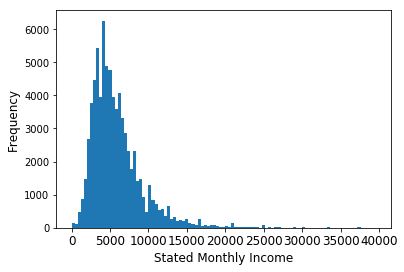

In [21]:
# Distribution of stated monthly income
bins = np.arange(0, 40000, 400)
loans['StatedMonthlyIncome'].hist(bins=bins, grid=False, xlabelsize=12, ylabelsize=10)
plt.xlabel("Stated Monthly Income", fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.show()

### Observation

From this histogram, I observed that the Stated Monthly Income is peaked at 5,000. The plot shows that very borrowers have a stated income of over 20,000.

### Question 3: What are the Loan Terms?

### Visualization

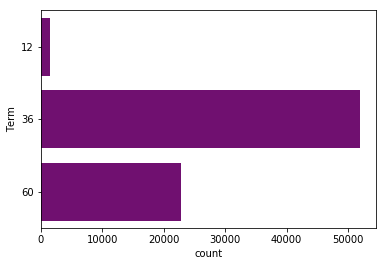

In [22]:
#plotting to show the loan Terms.

sb.countplot(data = loans, y = 'Term', color= 'purple');

### Observation

This countplot shows that there are three loan terms borrowers use. Majority of borrowers prefer the 36 months term (3years) while other go for the 60 months term (5 years).

### Question 4: What BorrowerAPR has the highest count ?

### Visualization

Text(0.5,1,'What BorrowerAPR has the highest count?')

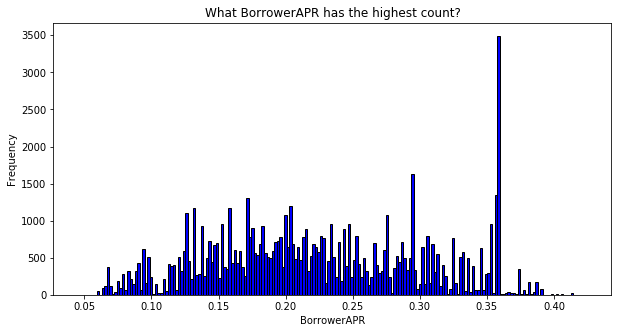

In [23]:
# Plotting a histogram plot  for BorrowerAPR
plt.figure(figsize=[10,5])
plt.hist(data = loans,x = 'BorrowerAPR', color='blue', edgecolor='black', bins=200)
plt.xlabel('BorrowerAPR')
plt.ylabel('Frequency')
plt.title('What BorrowerAPR has the highest count?')

### Observation

This histogram plot shows that the Borrower's APR has it's highest peak at 0.36, the second highest peak is at 0.3. Only very few loans have APR greater than 0.4.

### Visualization

### Question 5: What is the Highest Borrower Rate?

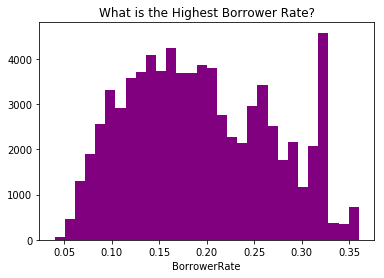

In [24]:
# Plot the BorrowerRate Histogram
ax = plt.hist(data =loans, x='BorrowerRate', bins=30, color = 'purple');
plt.xlabel('BorrowerRate')
plt.title('What is the Highest Borrower Rate?')
plt.show()

### Observation

This histogram plot shows that the highest borrower's rate is around 0.32. 

### Ordinal Categories

In [25]:
# convert ProsperRating (Alpha) and IncomeRange to ordered categorical types for easy visualization.

rating_order = ['AA', 'A', 'B','C', 'D', 'E', 'HR']
ordered = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rating_order)
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(ordered)

# create ordinal categories for income
ordinal_rating = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
order = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
loans['IncomeRange'] = loans['IncomeRange'].astype(order)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Question 6: What ProsperRating (Alpha) has the Highest Rating?

### Question 6a: Do Unemployed People Request for Loans?

### Visualization

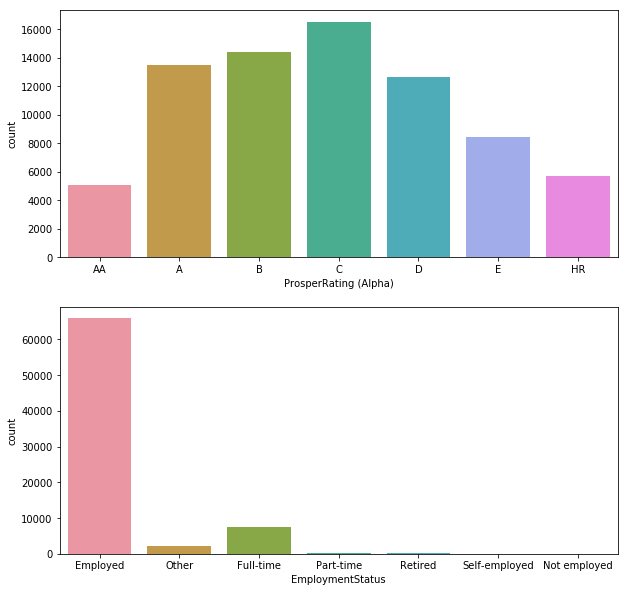

In [26]:
#Plotting a Countplot to show Employment status and ProsperRating
fig, ax = plt.subplots(nrows=2, figsize = [10,10])
sb.set (style='darkgrid')
sb.countplot(x='ProsperRating (Alpha)', data=loans, ax = ax[0])
sb.countplot(x='EmploymentStatus', data=loans, ax = ax[1]);

### Observation

The first plot shows that borrowers has the most prosper rating among A to C. The second plot shows that majority of the borrowers are employed and a few of them are full-time.

### Question 7: What Loan amount is commonly requested for?

### Visualization

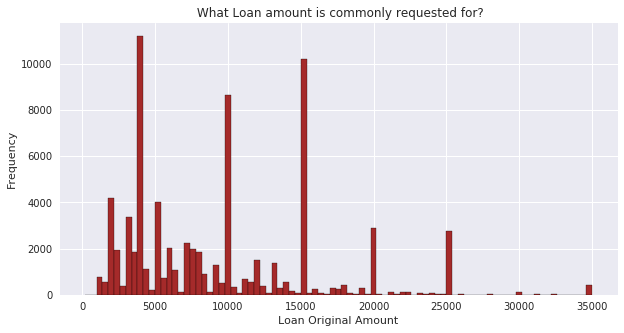

In [27]:
#plotting a Histogram to show the Loan Original Amount
plt.figure(figsize=[10,5])

bins = np.arange(200, loans.LoanOriginalAmount.max()+400, 400)
plt.hist(data = loans, x = 'LoanOriginalAmount', color='brown', edgecolor='black',bins = bins);
plt.title(" What Loan amount is commonly requested for?")
plt.xlabel('Loan Original Amount')
plt.ylabel("Frequency")
plt.show()

### Observation

From the histogram above, It is observed that the commonly request loan amount is 4,000, followed by 15,000 and 10,000. Very few borrowers request for loans above 30,000.

### Question 8: What Months has the Highest LoanOriginationDate?

### Visualization

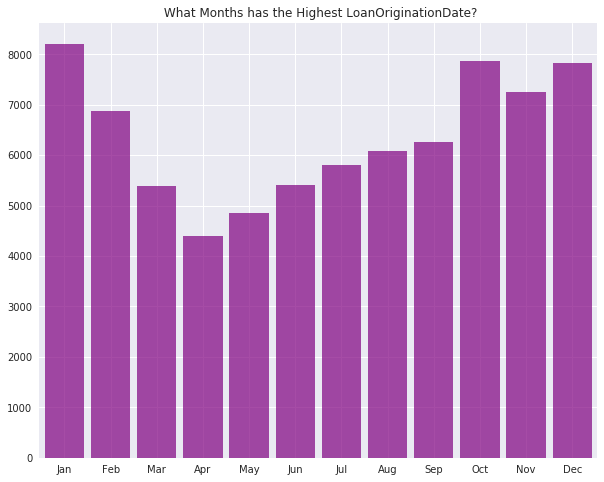

In [68]:
# Plotting a Histogram showing LoanOriginalDate- Months

plt.figure(figsize=[10,8])
bins = np.arange(loans['LoanOriginationDate'].dt.month.min()-0.5, loans['LoanOriginationDate'].dt.month.max()+1.5, 1)
ticks = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.hist(loans['LoanOriginationDate'].dt.month, color='purple',alpha=0.7, bins=bins, rwidth=0.85);
plt.title(" What Months has the Highest LoanOriginationDate?")
plt.xticks(ticks, labels)
plt.grid(False, axis='LoanOriginationDate')
plt.tick_params(axis='LoanOriginationDate', length=0) 
plt.margins(x=0.01) 
plt.show()

### Observation

The chart shows that the months with the highest Loan Origination Dates are January, October and December.

#### Listing

In [29]:
#checking the counts
loans['ListingCategory (numeric)'].value_counts()

1     48609
7      8281
2      6328
3      3645
6      2032
13     1767
15     1382
14      795
18      783
20      730
19      712
16      289
11      201
5       201
8       191
9        83
10       82
17       49
12       45
0        19
Name: ListingCategory (numeric), dtype: int64

In [30]:
listing_categories = {0 : 'Not Available', 
                1 : 'Debt Consolidation', 
                2 : 'Home Improvement', 
                3 : 'Business', 
                4 : 'Personal Loan', 
                5 : 'Student Use', 
                6 : 'Auto', 
                7 : 'Other', 
                8 : 'Baby&Adoption', 
                9 : 'Boat', 
                10 : 'Cosmetic Procedure', 
                11 : 'Engagement Ring', 
                12 : 'Green Loans', 
                13 : 'Household Expenses', 
                14 : 'Large Purchases', 
                15 : 'Medical/Dental', 
                16 : 'Motorcycle', 
                17 : 'RV', 
                18 : 'Taxes', 
                19 : 'Vacation', 
                20 : 'Wedding Loans'}

In [31]:
# replacing the existing numeric variables with the meanings 

loans['ListingCategory'] = loans['ListingCategory (numeric)'].replace(to_replace=listing_categories)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Question 9: What are the reasons for requesting a loan?

### Visualization

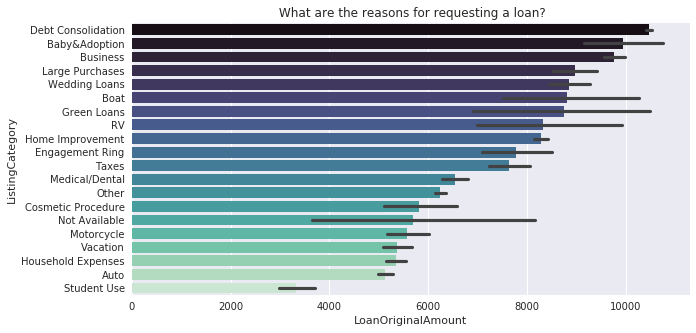

In [32]:
fig=plt.figure(figsize=[10,5])
result = loans.groupby(['ListingCategory'])['LoanOriginalAmount'].mean().sort_values(ascending=False).index
sb.barplot(x='LoanOriginalAmount',y='ListingCategory',data=loans, palette='mako', order=result)
plt.title(" What are the reasons for requesting a loan?")
plt.show()

### Observation

This barplot shows that the highest reason for borrowing the loan is Debt Consolidation, followed by Baby& Adoption. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Borrower's APR plot shows that the Borrower's APR has it's highest peak at 0.36, the second highest peak is at 0.3. Only very few loans have APR greater than 0.4.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The plot that reflect the Loanorigination Date, I converted the datatype from object to datetime, to enable easy plotting.

> For the ListingCategories. I replaced the existing numeric variables with the meanings to get a true picture of the dataset.


## Bivariate Exploration

> In this section, I want to look at the pairwise correlations present between features in the data.
> I'll also separate the variables of interest into Numeric and Categorical for better visualization.

In [33]:
# separate into numeric and categorical features

numeric = ['BorrowerAPR', 'BorrowerRate','DebtToIncomeRatio', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'LoanOriginalAmount']

category = ['Term', 'LoanStatus', 'EmploymentStatus', 'IsBorrowerHomeowner','IncomeRange', 'ProsperRating (Alpha)',
            'ListingCategory' ]

### Question:  Pairwaise correlation plot

### Visualization

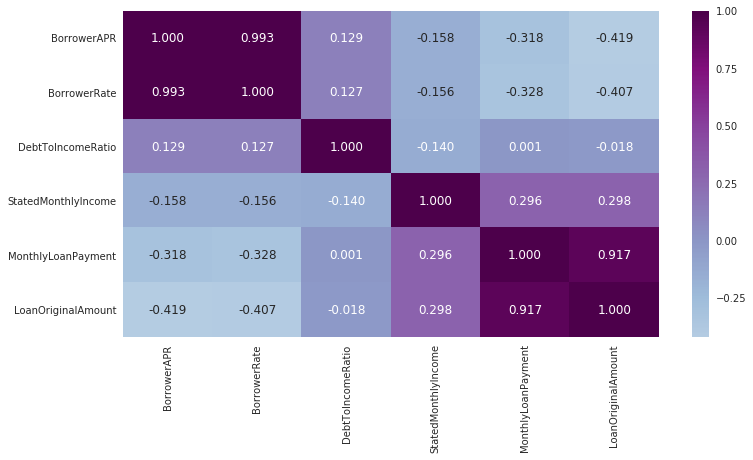

In [34]:
# Plotting a pairwaise correlation plot
plt.figure(figsize = [12, 6])
sb.heatmap(loans[numeric].corr(), annot = True, fmt = '.3f', center = 0, cmap = 'BuPu')
plt.show()

### Observation

From the heat map, I observed that there is a strong relationship between Monthly Loan Payment and Loan Original Amount.

 ### Question : Borrower APR against Original Loan Amount

### Visualization

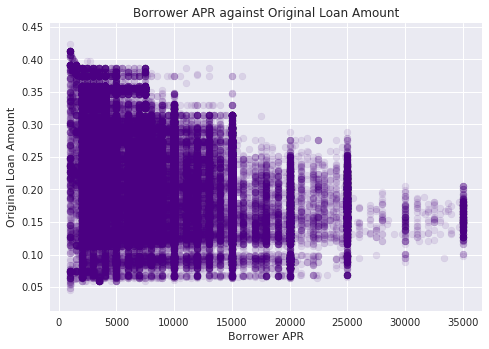

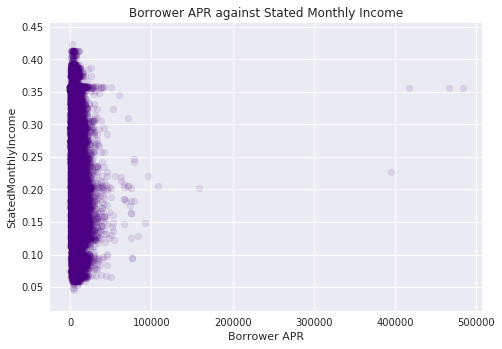

In [35]:
fig=plt.figure()

# Plotting a Scatter plot of Borrower APR against Original Loan Amount
plt.subplot(1,2,1)
ax=fig.add_axes([0,0,1,1])
ax.scatter(data=loans, y='BorrowerAPR', x='LoanOriginalAmount', color='indigo', alpha= 2/20);
ax.set_xlabel('Borrower APR')
ax.set_ylabel('Original Loan Amount')
ax.set_title('Borrower APR against Original Loan Amount')
plt.show()

# Plotting a Scatter plot of Borrower APR against Stated Monthly Income
fig=plt.figure()
plt.subplot(1,2,2)
ax=fig.add_axes([0,0,1,1])
ax.scatter(data=loans, y='BorrowerAPR', x='StatedMonthlyIncome', color='indigo', alpha= 2/20);
ax.set_xlabel('Borrower APR')
ax.set_ylabel('StatedMonthlyIncome')
ax.set_title('Borrower APR against Stated Monthly Income')

plt.show()

### Observation

In first plot, I noticed that as the Original Loan amount increases the Borrower APR reduce. Loan amounts between 1 to 5000 has the highest Borrower APR. In the second plot, I observed that the stated monthly incomes does not  have a strong effect on the Borrower APR.

 ### Question : Estimated Returns by IncomeRange vs EmploymentStatus

### Visualization

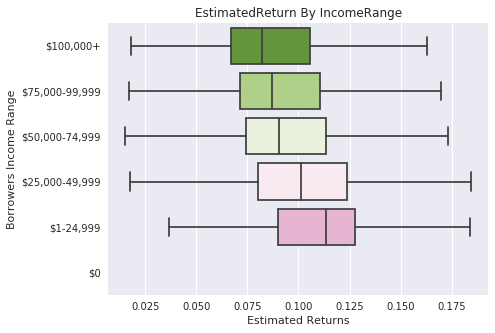

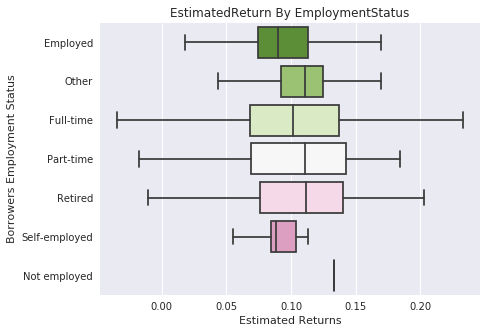

In [36]:
#Plotting two box plots to show the EstimatedReturn By IncomeRange and EmploymentStatus

plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 1)
sb.boxplot(data = loans, x="EstimatedReturn", y="IncomeRange", palette = "PiYG_r", showfliers = False);
plt.ylabel('Borrowers Income Range')
plt.xlabel('Estimated Returns')
plt.title('EstimatedReturn By IncomeRange')
plt.show()

plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 2)
sb.boxplot(data = loans, x="EstimatedReturn", y="EmploymentStatus", palette = "PiYG_r", showfliers = False);
plt.ylabel('Borrowers Employment Status')
plt.xlabel('Estimated Returns')
plt.title('EstimatedReturn By EmploymentStatus')
plt.show()

### Observation

From the first boxplot, I observed that the income range $1-24,999 has the highest median Estimated Returns which is around 0.115.

In the second boxplot, I observed that Part-time Retired employees and others has a higher median for Estimated returns.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I noticed that as the Original Loan amount increases the Borrower APR reduces. Loan amounts between 1 to 5000 has the highest Borrower APR
> In the heat map, I noticed a strong correlations between BorrowerAPR and BorrowerRate and between MonthlyLoanPayment and LoanOriginalAmount.
> I observed that the stated monthly incomes does not have a strong effect on the Borrower APR.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that there is a strong relationship between Monthly Loan Payment and Loan Original Amount.



## Multivariate Exploration

I will create a plot to explore the Relationship between borrower APR, Term and Prosper Rating and the relationship of APR and loan amount

 ### Question : Relationship between borrower APR, Term and Prosper Rating

### Visualization

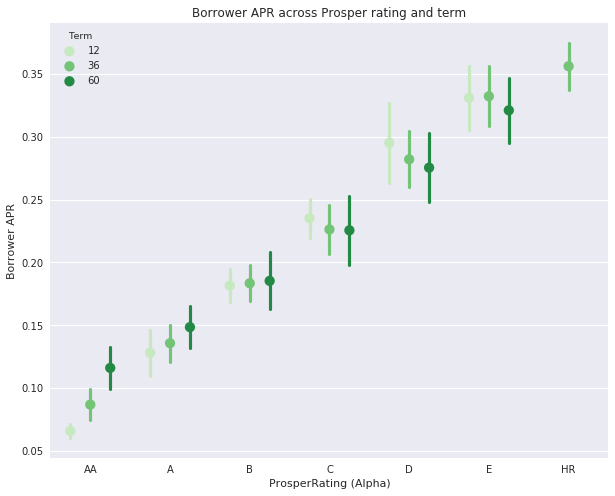

In [40]:
# Exploring the relationship between borrower APR, Term and Prosper Rating

#Custom order of the x-ticks labels

custom_order = ['AA', 'A', 'B','C', 'D', 'E', 'HR']

#plotting the pointplot with the custom x-tick labels
fig = plt.figure(figsize = [10,8])
ax = sb.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term', palette = 'Greens', ci='sd', linestyles = '', dodge = 0.5);
plt.title('Borrower APR By Prosper rating and term')
plt.ylabel('Borrower APR')
ax.set_yticklabels([],minor = True)

#set the x-ticks labels
ax.set_xticklabels(custom_order, fontsize= 10);


### Observation

In this pointplot I observed that as the prosper rating increases the Borrower APR increases.

 ### Question : Relationship of APR and loan amount

### Visualization

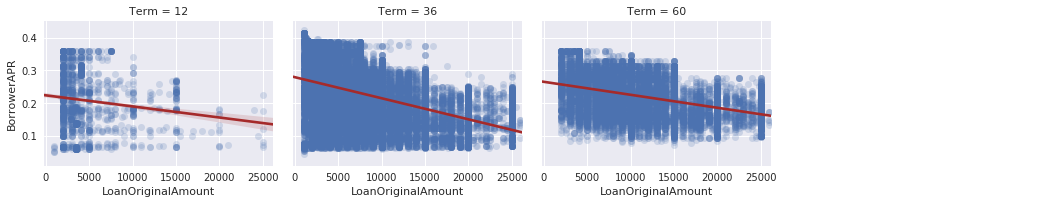

In [38]:
# Plotting a Regression Plot to show the  Term effect on relationship of Borrower APR and loan amount
g=sb.FacetGrid(data=loans, aspect=1.2,  col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.2}, line_kws={'color':'brown'});
g.add_legend();

### Observation

These regression plots shows that Term doesn't have an effect on relationship of Borrower APR and loan original amount

 ### Question : Effect of ProsperRating (Alpha) on APR and LoanOriginalAmount 

### Visualization

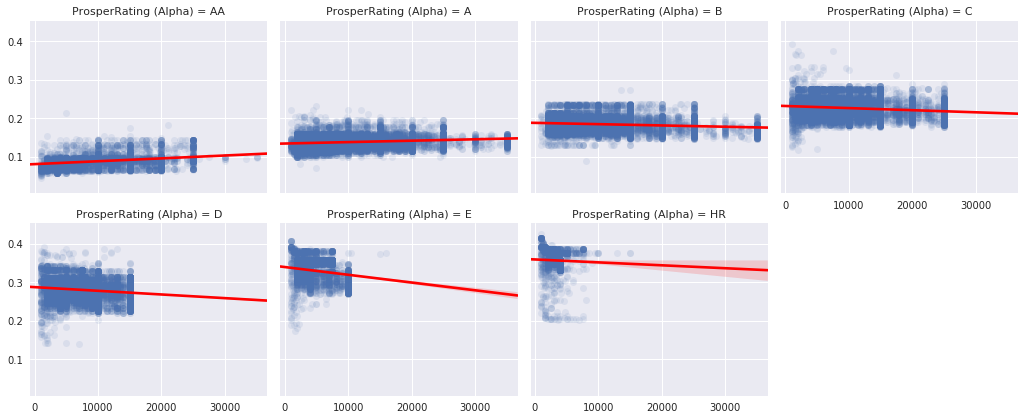

In [39]:
#Plotting a Regression plot to show the effect of ProsperRating (Alpha) on APR and LoanOriginalAmount 

g = sb.FacetGrid(data = loans, aspect=1.2,col="ProsperRating (Alpha)", col_wrap=4, margin_titles=True)
g.map_dataframe(sb.regplot, x="LoanOriginalAmount", y="BorrowerAPR", scatter_kws={'alpha': 2/20}, line_kws={'color':'red'})
plt.show()

### Observation

In the regression plot above, I observed that The loan original  amount increases with better rating. The borrower APR decreases with better rating. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the regression plot, I observed that The loan original amount increases with better rating. The borrower APR decreases with better rating.
>  I observed that as the prosper rating increases the Borrower APR increases.
### Were there any interesting or surprising interactions between features?

> I observed Term doesn't have an effect on relationship of Borrower APR and loan original amount.